In [1]:
from dlcliche.notebook import *
from dlcliche.utils import (
    sys, random, Path, np, plt,
    ensure_folder, deterministic_everything,
)

sys.path.append('..')
import common as com

import keras_model

param = com.yaml_load()
dirs = com.select_dirs(param=param, mode='development')

deterministic_everything(2020)

dirs

Using TensorFlow backend.
2020-03-14 11:47:10,404 - INFO - load_directory <- development


['/home/foo/dcase2020_task2_variants/dev_data/ToyCar']

In [2]:
for idx, target_dir in enumerate(dirs):
    print("\n===========================")
    print("[{idx}/{total}] {dirname}".format(dirname=target_dir, idx=idx+1, total=len(dirs)))

    # set path
    machine_type = str(target_dir).split('/')[-1]
    model_file_path = "{model}/model_{machine_type}.hdf5".format(model=param["model_directory"],
                                                                 machine_type=machine_type)

    if not Path(model_file_path).exists():
        com.logger.info(f"skipping, {model_file_path} does not exist...")
        continue

    # generate dataset
    files = com.file_list_generator(target_dir)[:10]
    train_data = com.list_to_vector_array(files,
                                          msg="generate train_dataset",
                                          n_mels=param["feature"]["n_mels"],
                                          frames=param["feature"]["frames"],
                                          n_fft=param["feature"]["n_fft"],
                                          hop_length=param["feature"]["hop_length"],
                                          power=param["feature"]["power"])

    # load model
    model = keras_model.get_model(param["feature"]["n_mels"] * param["feature"]["frames"])
    #model.summary()
    model.compile(**param["fit"]["compile"])
    model.load_weights(model_file_path)

2020-03-14 11:47:10,793 - INFO - target_dir : /home/foo/dcase2020_task2_variants/dev_data/ToyCar
2020-03-14 11:47:10,800 - INFO - train_file num : 4000



[1/1] /home/foo/dcase2020_task2_variants/dev_data/ToyCar


2020-03-14 11:47:10,816 - INFO - Creating data for 10 files: size=3400, shape=(640,)


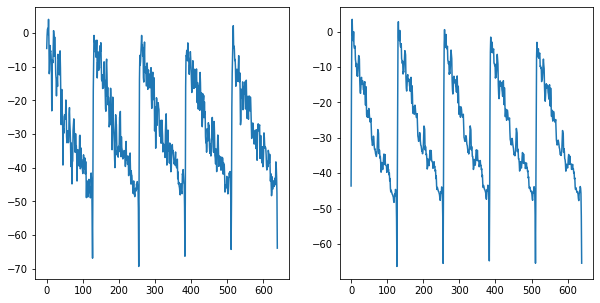

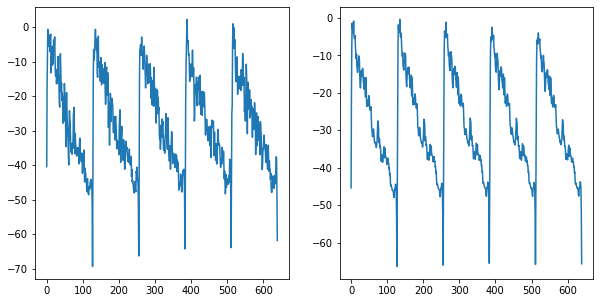

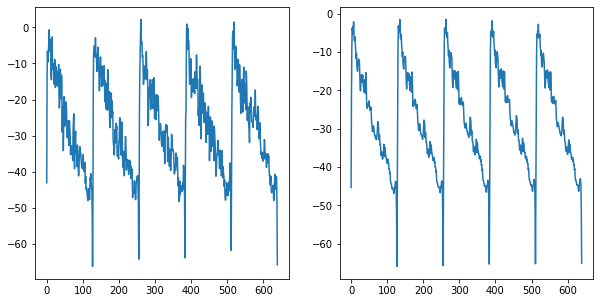

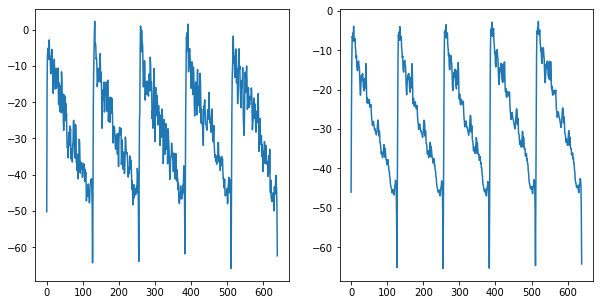

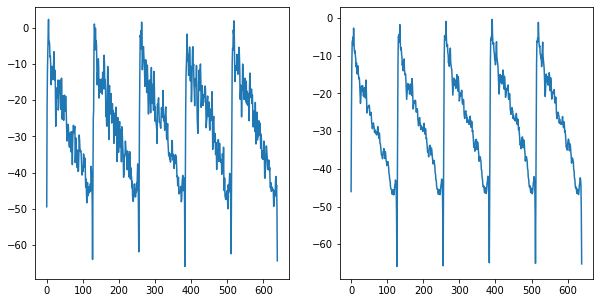

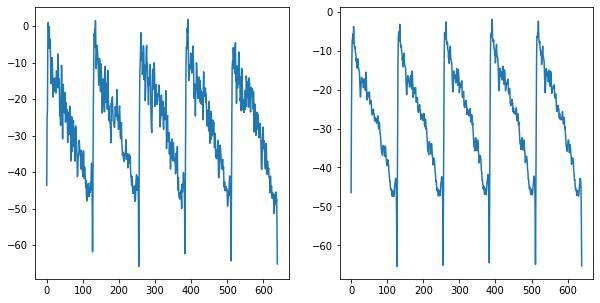

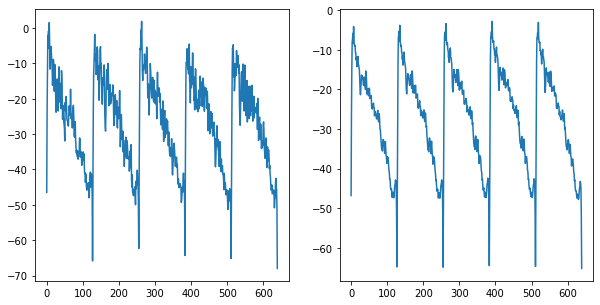

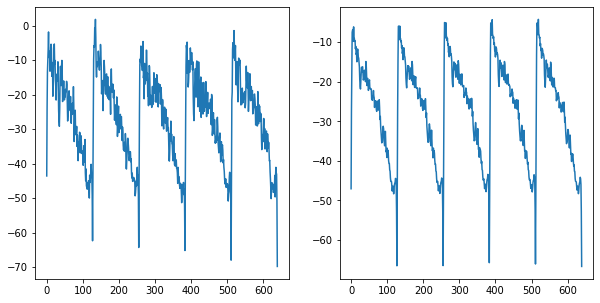

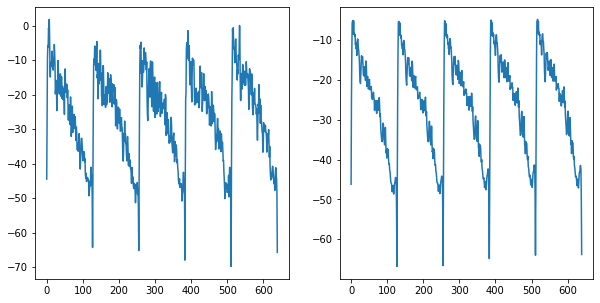

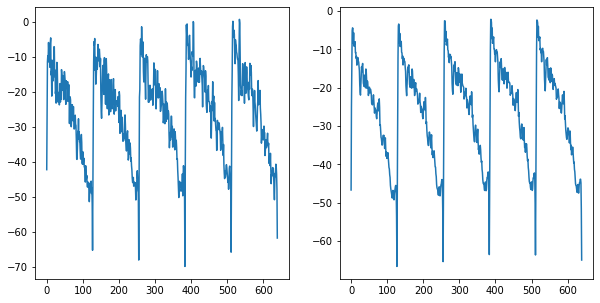

In [4]:
preds = model.predict(train_data)

# Show
k = 10
for reconstructed, org in zip(preds[:k], train_data[:k]):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(org); axs[1].plot(reconstructed);